In [1]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.datasets as dsets
from skimage import transform
import torchvision.transforms as transforms
from torch.autograd import Variable
import pandas as pd;
import numpy as np;
from torch.utils.data import Dataset, DataLoader
# from vis_utils import *
import random
import h5py
import math
import torch.nn.functional as F

In [2]:
# Hyperparameters
num_epochs = 2
num_classes = 10
batch_size = 1
learning_rate = 0.001

DATA_PATH = 'MNIST'
MODEL_STORE_PATH = 'pytorch_model\\'

In [3]:
# transforms to apply to the data
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=True, transform=trans, download=True)
test_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=False, transform=trans)

In [4]:
# transforms to apply to the data
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=True, transform=trans, download=True)
test_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=False, transform=trans)

In [5]:
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [6]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(16384, 1000)
#         self.fc1 = nn.Linear(7 * 7 * 64, 1000)
        self.fc2 = nn.Linear(1000, 1)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.drop_out(out)
#         print('shape, before fc1', out.shape)
        out = self.fc1(out)
#         out = self.fc2(out)
        out = F.relu(self.fc2(out))
        return out

In [7]:
model = ConvNet()

# Loss and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()  # this is for regression mean squared loss

In [8]:
# # Train the model
# total_step = len(train_loader)
# loss_list = []
# acc_list = []
# for epoch in range(num_epochs):
#     for i, (images, labels) in enumerate(train_loader):
#         # Run the forward pass
#         print(images.shape)
#         images = Variable(images.float())
#         print(images.shape)
#         print(images.type)
#         labels = Variable(labels)
#         print('labels')
#         print(labels)
#         print(labels.shape)
#         outputs = model(images)
#         loss = loss_func(outputs, labels)
#         loss_list.append(loss.item())

#         # Backprop and perform Adam optimisation
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         # Track the accuracy
#         total = labels.size(0)
#         _, predicted = torch.max(outputs.data, 1)
#         correct = (predicted == labels).sum().item()
#         acc_list.append(correct / total)

#         if (i + 1) % 100 == 0:
#             print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
#                   .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
#                           (correct / total) * 100))

In [9]:
# print('Here is the size of the input images:', images.shape)
# print('Here is the size of the outputs:', outputs.shape)

In [10]:
import matplotlib.pyplot as plt
from PIL import Image


# plt.imshow(IMAGE)
# plt.show()

In [11]:
number_brains_train = 100
brains = []
for i in range(1, 1+number_brains_train):
    with h5py.File('../Brains/%s.mat' %i, 'r') as f:
#         print(list(f.keys()))
#         print(list(f['cjdata'].keys()))
        brain = np.array(f['cjdata']['image'])
        brain = brain[::8, ::8]
        brains += [brain]

# columns = 2
# rows = 5

# fig=plt.figure(figsize=(20, 20))
# for i in range(1, 11):
#     brain = brains[i-1]
#     fig.add_subplot(rows, columns, i)
#     plt.imshow(brain)
# plt.show()


In [12]:
resulting_brains = []
vars_ = []
number_brains_blurried = 10

for l in range(len(brains)):
    test_brain = brains[l]/1000
    resulting_brains.append(test_brain)
    vars_.append(0)
    for i in range(number_brains_blurried):
        var = 0
        changed_brain = np.copy(test_brain)
        for j in range(64):
            for k in range(64):
                value = changed_brain[k][j]
                add = np.random.randint(max(-value, -1000+100*i), 1000-100*i)/1000
                #print(changed_brain[k][j])
                changed_brain[k][j] = value + add
                #print(changed_brain[k][j])

                var = var + add/1000
        resulting_brains.append(changed_brain)
        vars_.append(var)

In [13]:
print(len(vars_))
print(len(resulting_brains))

print((test_brain/1000)[32][32])

1100
1100
0.001454


In [14]:
# labels_ = np.random.randint(1, 10, 10).reshape(10, 1)
# print(np.array(brains).shape)
# brains = np.array(brains).reshape(10, 1, 64, 64)
# print(labels_.shape, brains.shape)
# print(labels_)

vars_ = np.array(vars_).reshape(number_brains_train*(number_brains_blurried+1), 1)
resulting_brains = np.array(resulting_brains).reshape(number_brains_train*(number_brains_blurried+1), 1, 64, 64)

print(vars_.shape[0], vars_.shape)

1100 (1100, 1)


In [15]:
# Train the model
total_step = vars_.shape[0]
loss_list = []
acc_list = []
for epoch in range(num_epochs):
#     for i, (images, labels) in enumerate(train_loader):
#         # Run the forward pass
#         images = Variable(images.float())
#         labels = Variable(labels)
#         outputs = model(images)
    for i in range(vars_.shape[0]):
        images = torch.from_numpy(resulting_brains[i].reshape(1, 1, 64, 64))
        images = Variable(images.float())

        labels = torch.from_numpy(vars_[i])
#         labels = Variable(labels.float())
#         labels = labels.float()
        outputs = model(images)
#         print('Out:', outputs)
#         print('Lab:', labels)
        loss = criterion(outputs, labels.float())
#         print('Loss:', loss)
        loss_list.append(loss.item())

        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward(retain_graph=True)
        optimizer.step()

#         # Track the accuracy
#         total = labels.size(0)
#         _, predicted = torch.max(outputs.data, 1)
#         correct = (predicted == labels).sum().item()
#         acc_list.append(correct / total)

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))

Epoch [1/2], Step [100/1100], Loss: 0.0180
Epoch [1/2], Step [200/1100], Loss: 0.2650
Epoch [1/2], Step [300/1100], Loss: 0.1106
Epoch [1/2], Step [400/1100], Loss: 0.4047
Epoch [1/2], Step [500/1100], Loss: 0.0240
Epoch [1/2], Step [600/1100], Loss: 0.0188
Epoch [1/2], Step [700/1100], Loss: 0.0106
Epoch [1/2], Step [800/1100], Loss: 0.0048
Epoch [1/2], Step [900/1100], Loss: 0.0561
Epoch [1/2], Step [1000/1100], Loss: 0.0026
Epoch [1/2], Step [1100/1100], Loss: 0.1658
Epoch [2/2], Step [100/1100], Loss: 0.0643
Epoch [2/2], Step [200/1100], Loss: 0.0037
Epoch [2/2], Step [300/1100], Loss: 0.0303
Epoch [2/2], Step [400/1100], Loss: 0.0180
Epoch [2/2], Step [500/1100], Loss: 0.0047
Epoch [2/2], Step [600/1100], Loss: 0.0032
Epoch [2/2], Step [700/1100], Loss: 0.0034
Epoch [2/2], Step [800/1100], Loss: 0.0371
Epoch [2/2], Step [900/1100], Loss: 0.0067
Epoch [2/2], Step [1000/1100], Loss: 0.0001
Epoch [2/2], Step [1100/1100], Loss: 0.0085


In [16]:
resulting_brains_test = []
vars_test= []

brains_test = []
for i in range(len(brains), len(brains)+10):
    with h5py.File('../Brains/%s.mat' %i, 'r') as f:
#         print(list(f.keys()))
#         print(list(f['cjdata'].keys()))
        brain = np.array(f['cjdata']['image'])
        brain = brain[::8, ::8]
        brains_test += [brain]

for l in range(len(brains_test)):
    test_brain = brains_test[l]/1000
    resulting_brains_test.append(test_brain)
    vars_test.append(0)
    for i in range(10):
        var = 0
        changed_brain = np.copy(test_brain)
        for j in range(64):
            for k in range(64):
                value = changed_brain[k][j]
                add = np.random.randint(max(-value, -1000+100*i), 1000-100*i)/1000
                #print(changed_brain[k][j])
                changed_brain[k][j] = value + add
                #print(changed_brain[k][j])

                var = var + add/1000
        resulting_brains_test.append(changed_brain)
        vars_test.append(var)

In [17]:
# Test the model
model.eval()
with torch.no_grad():
#     for images, labels in test_loader:
   for i in range(len(vars_test)):
        images = torch.from_numpy(resulting_brains_test[i].reshape(1, 1, 64, 64))
        images = Variable(images.float())
        outputs = model(images)
          
        print('OUT', outputs.data[0][0], 'REAL', vars_test[i])

OUT tensor(0.1799) REAL 0
OUT tensor(1.9029) REAL 2.024494999999998
OUT tensor(1.7031) REAL 1.8094250000000012
OUT tensor(1.5843) REAL 1.6542090000000038
OUT tensor(1.3917) REAL 1.433150000000001
OUT tensor(1.1695) REAL 1.2262039999999996
OUT tensor(0.9932) REAL 1.0090029999999983
OUT tensor(0.8012) REAL 0.827113999999998
OUT tensor(0.6008) REAL 0.6150499999999994
OUT tensor(0.4415) REAL 0.4079200000000005
OUT tensor(0.2912) REAL 0.20396500000000062
OUT tensor(0.2339) REAL 0
OUT tensor(2.0059) REAL 2.0800219999999987
OUT tensor(1.7817) REAL 1.8357109999999985
OUT tensor(1.5722) REAL 1.6394899999999988
OUT tensor(1.4085) REAL 1.4090010000000022
OUT tensor(1.2461) REAL 1.2309860000000032
OUT tensor(1.0226) REAL 1.0231780000000001
OUT tensor(0.8366) REAL 0.8063750000000023
OUT tensor(0.6659) REAL 0.6117769999999989
OUT tensor(0.4897) REAL 0.4023390000000005
OUT tensor(0.3441) REAL 0.19941400000000134
OUT tensor(0.3072) REAL 0
OUT tensor(2.0616) REAL 2.0586270000000013
OUT tensor(1.8742) R

In [18]:
test_input = resulting_brains_test[5]
test_input = torch.from_numpy(test_input.reshape(1, 1, 64, 64))
# test_input.requires_grad = True
# print()
test_input = Variable(test_input.float(), requires_grad=True)
test_output = model(test_input)  
test_output.backward(retain_graph=True)
print(test_output)
# test_output = Variable(test_output, requires_grad=True)
# test_output.requires_grad = True
print(test_output)
print(test_input)
d = torch.autograd.grad(test_output, test_input, allow_unused=True)
print(d)

tensor([[1.1695]], grad_fn=<ReluBackward0>)
tensor([[1.1695]], grad_fn=<ReluBackward0>)
tensor([[[[0.2150, 0.3970, 0.0190,  ..., 0.2550, 0.1690, 0.2360],
          [0.3220, 0.5330, 0.4050,  ..., 0.5120, 0.3440, 0.5820],
          [0.3360, 0.0570, 0.3570,  ..., 0.3760, 0.1760, 0.2940],
          ...,
          [0.4030, 0.0170, 0.0890,  ..., 0.0540, 0.4300, 0.3650],
          [0.1320, 0.5710, 0.2900,  ..., 0.1890, 0.3940, 0.5330],
          [0.0760, 0.2350, 0.4180,  ..., 0.5030, 0.5380, 0.2450]]]],
       requires_grad=True)
(tensor([[[[ 1.0228e-03, -1.7828e-04,  1.6092e-03,  ...,  8.8090e-04,
            1.9503e-04, -9.7314e-05],
          [ 2.5454e-05,  5.9826e-04,  1.8301e-04,  ...,  2.5175e-04,
            1.2756e-03, -3.4439e-04],
          [ 5.3409e-04, -4.0471e-04,  5.6719e-04,  ...,  2.1987e-03,
            1.9176e-03,  2.1100e-03],
          ...,
          [ 1.0289e-03, -2.0988e-05, -1.8492e-03,  ..., -1.3693e-03,
            1.4324e-03, -1.0055e-03],
          [ 4.1785e-05,  1.

In [19]:
print(d[0].shape)

torch.Size([1, 1, 64, 64])


In [20]:
# m = nn.Linear(2, 1)
# inputa = torch.ones(1, 2)
# inputa.requires_grad = True
# output = m(inputa).sum()
# output.backward(retain_graph=True)
# print(inputa.grad.data)

# print('INPUT:')
# print(inputa)
# print('OUTPUT:')
# print(output)
# print('LINEAR:')
# print(m)
# print('F(INPUT):', m(inputa))

In [21]:
# print(m.weight)
# print(torch.autograd.grad(output, inputa))

In [22]:
# test_input = resulting_brains_test[0]
# test_input = torch.from_numpy(test_input.reshape(1, 1, 64, 64))
# # test_input.requires_grad = True
# # print()
# test_input = Variable(test_input.float())
# test_output = model(test_input)  
# test_output.backward()
# print(test_output)
# # test_output.requires_grad = True

In [23]:
# print(test_input)

In [24]:
# d = torch.autograd.grad(test_output, test_input)

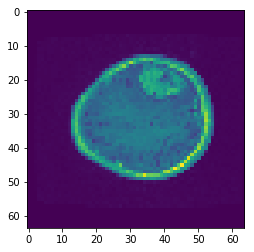

In [25]:
# GRADIENT DESCENT

with h5py.File('../Brains/%s.mat' %i, 'r') as f:
    brain = np.array(f['cjdata']['image'])
    brain = brain[::8, ::8]
    image_to_reconstruct = brain

plt.imshow(image_to_reconstruct)
plt.show()

In [26]:
import scipy.io
mat_90 = scipy.io.loadmat('thinL64_90')
print(mat_90['H'].todense())
print(mat_90['H'].todense().shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(8100, 4096)


In [27]:
A_90 = mat_90['H'].todense()
print(A_90.shape)

(8100, 4096)


In [28]:
p_90 = np.transpose(np.matmul(A_90, image_to_reconstruct.flatten()))

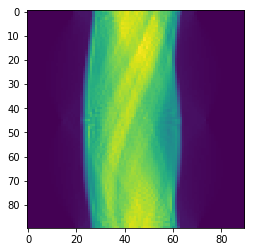

In [29]:
plt.imshow(p_90.reshape(90, 90))    
plt.show()

In [30]:
def f(x):
    global A_90
    p = np.transpose(np.matmul(A_90, np.transpose(x.flatten())))
    return p.reshape(90, 90)

def cost_function(x, y):
    return np.linalg.norm(f(x)-y.reshape(90, 90))
    
def grad_cost_function(x, y):
    global A_90
    U1 = np.matmul(np.transpose(A_90), np.transpose(f(x).flatten()))
#     print(y.flatten().shape)
    U2 = np.matmul(np.transpose(A_90), np.transpose(y.flatten()))
#     return (np.dot(np.transpose(A), f(x)) - np.dot(np.transpose(A), y))
    return U1.reshape(64, 64) - U2.reshape(64, 64)


In [42]:
nn_importance = 1000

def f(x):
    global A_90
    p = np.transpose(np.matmul(A_90, np.transpose(x.flatten())))
    return p.reshape(90, 90)

def cost_function_nn(x, y, nn_importance):
#     global nn_importance
    nn_input = torch.from_numpy((x/1000).reshape(1, 1, 64, 64))
#     print(nn_input.view(1, 1, 64, 64).shape)
    nn_input = Variable(nn_input.float(), requires_grad=True)
    nn_output = model(nn_input.view(1, 1, 64, 64))
#     print('xxx')
#     print(np.linalg.norm(f(x)-y.reshape(90, 90)))
#     print(nn_importance * nn_output[0][0])
#     print('xxx')
    return np.linalg.norm(f(x)-y.reshape(90, 90)) + nn_importance * nn_output[0][0]
    
def grad_cost_function_nn(x, y, nn_importance):
    global A_90
#     global nn_importance
    U1 = np.matmul(np.transpose(A_90), np.transpose(f(x).flatten()))
#     print(y.flatten().shape)
    U2 = np.matmul(np.transpose(A_90), np.transpose(y.flatten()))
#     return (np.dot(np.transpose(A), f(x)) - np.dot(np.transpose(A), y))

    nn_input = torch.from_numpy((x/1000).reshape(1, 1, 64, 64))
    nn_input = Variable(nn_input.float(), requires_grad=True)
    nn_output = model(nn_input.view(1, 1, 64, 64))
    nn_output.backward(retain_graph=True)
    d = torch.autograd.grad(nn_output, nn_input, allow_unused=True)
#     print(d[0].shape)
    if d[0].shape == torch.Size([1, 1, 64, 64]):
        d = d[0][0][0]
    else:
        d = d[0]
    print('classical:')
    print((U1.reshape(64, 64) - U2.reshape(64, 64))[32])
    print('special:')
    print(nn_importance * d.numpy()[32])
    return U1.reshape(64, 64) - U2.reshape(64, 64) + nn_importance * d.numpy()
#     return d.numpy()
    


In [43]:
itr = 101
lr = 0.00001
cur_x_nn = np.random.rand(64, 64)
cur_x = np.random.rand(64, 64)


for i in range(itr+1):
    
    nn_importance = 100000 * i * i
    
    prev_x_nn = cur_x_nn
    prev_x = cur_x
    
    r_nn = grad_cost_function_nn(prev_x_nn, p_90, nn_importance)
    r = grad_cost_function(prev_x, p_90)
#     grad_rec = grad_cost_function(prev_x, p_90)
    
    cur_x = cur_x - lr * r
    cur_x_nn = cur_x_nn - lr * r_nn
    
    
    if i%100 == 0:
        print('___________________________')
        print(cost_function_nn(cur_x_nn, p_90, nn_importance))
        print(cost_function(cur_x, p_90))
        print(i / ( itr - 1 ) * 100, '% done')
        # print(cur_x - original_list[color])

classical:
[[-1136316.23635183 -1367153.26467019 -1367436.6087222  -1395011.27245269
  -1456493.89188066 -1519968.18052884 -1601656.94451576 -1674647.92332249
  -1771967.43125421 -1860063.32827001 -1973309.45327901 -2127283.2576465
  -2368328.61784729 -2629394.27477178 -2839424.67617367 -2886720.21130297
  -2984623.11828495 -2913615.38728739 -3032442.46867387 -3104536.43193529
  -3175766.66124875 -3230247.22562314 -3294609.50913353 -3323627.62172875
  -3381973.62940457 -3452631.0932314  -3501071.37901001 -3532858.21497889
  -3573648.45217415 -3590137.11302062 -3684652.3324959  -3685781.94923028
  -3718838.03970823 -3726096.48444111 -3664713.28838763 -3658878.11626247
  -3641831.92924412 -3651314.69496097 -3618193.61914048 -3591749.26891397
  -3564948.44602041 -3568549.21856001 -3519800.37441122 -3480060.7629643
  -3421780.28131963 -3384026.47021654 -3255775.85280252 -3316306.98135053
  -3225499.21963467 -3195605.95898246 -3138869.62305885 -3129174.33286952
  -3097633.93224797 -2922472.

classical:
[[-1136316.23635183 -1367153.26467019 -1367436.6087222  -1395011.27245269
  -1456493.89188066 -1519968.18052884 -1601656.94451576 -1674647.92332249
  -1771967.43125421 -1860063.32827001 -1973309.45327901 -2127283.2576465
  -2368328.61784729 -2629394.27477178 -2839424.67617367 -2886720.21130297
  -2984623.11828495 -2913615.38728739 -3032442.46867387 -3104536.43193529
  -3175766.66124875 -3230247.22562314 -3294609.50913353 -3323627.62172875
  -3381973.62940457 -3452631.0932314  -3501071.37901001 -3532858.21497889
  -3573648.45217415 -3590137.11302062 -3684652.3324959  -3685781.94923028
  -3718838.03970823 -3726096.48444111 -3664713.28838763 -3658878.11626247
  -3641831.92924412 -3651314.69496097 -3618193.61914048 -3591749.26891397
  -3564948.44602041 -3568549.21856001 -3519800.37441122 -3480060.7629643
  -3421780.28131963 -3384026.47021654 -3255775.85280252 -3316306.98135053
  -3225499.21963467 -3195605.95898246 -3138869.62305885 -3129174.33286952
  -3097633.93224797 -2922472.

classical:
[[-1136316.23635183 -1367153.26467019 -1367436.6087222  -1395011.27245269
  -1456493.89188066 -1519968.18052884 -1601656.94451576 -1674647.92332249
  -1771967.43125421 -1860063.32827001 -1973309.45327901 -2127283.2576465
  -2368328.61784729 -2629394.27477178 -2839424.67617367 -2886720.21130297
  -2984623.11828495 -2913615.38728739 -3032442.46867387 -3104536.43193529
  -3175766.66124875 -3230247.22562314 -3294609.50913353 -3323627.62172875
  -3381973.62940457 -3452631.0932314  -3501071.37901001 -3532858.21497889
  -3573648.45217415 -3590137.11302062 -3684652.3324959  -3685781.94923028
  -3718838.03970823 -3726096.48444111 -3664713.28838763 -3658878.11626247
  -3641831.92924412 -3651314.69496097 -3618193.61914048 -3591749.26891397
  -3564948.44602041 -3568549.21856001 -3519800.37441122 -3480060.7629643
  -3421780.28131963 -3384026.47021654 -3255775.85280252 -3316306.98135053
  -3225499.21963467 -3195605.95898246 -3138869.62305885 -3129174.33286952
  -3097633.93224797 -2922472.

classical:
[[-1136316.23635183 -1367153.26467019 -1367436.6087222  -1395011.27245269
  -1456493.89188066 -1519968.18052884 -1601656.94451576 -1674647.92332249
  -1771967.43125421 -1860063.32827001 -1973309.45327901 -2127283.2576465
  -2368328.61784729 -2629394.27477178 -2839424.67617367 -2886720.21130297
  -2984623.11828495 -2913615.38728739 -3032442.46867387 -3104536.43193529
  -3175766.66124875 -3230247.22562314 -3294609.50913353 -3323627.62172875
  -3381973.62940457 -3452631.0932314  -3501071.37901001 -3532858.21497889
  -3573648.45217415 -3590137.11302062 -3684652.3324959  -3685781.94923028
  -3718838.03970823 -3726096.48444111 -3664713.28838763 -3658878.11626247
  -3641831.92924412 -3651314.69496097 -3618193.61914048 -3591749.26891397
  -3564948.44602041 -3568549.21856001 -3519800.37441122 -3480060.7629643
  -3421780.28131963 -3384026.47021654 -3255775.85280252 -3316306.98135053
  -3225499.21963467 -3195605.95898246 -3138869.62305885 -3129174.33286952
  -3097633.93224797 -2922472.

classical:
[[-1136316.23635183 -1367153.26467019 -1367436.6087222  -1395011.27245269
  -1456493.89188066 -1519968.18052884 -1601656.94451576 -1674647.92332249
  -1771967.43125421 -1860063.32827001 -1973309.45327901 -2127283.2576465
  -2368328.61784729 -2629394.27477178 -2839424.67617367 -2886720.21130297
  -2984623.11828495 -2913615.38728739 -3032442.46867387 -3104536.43193529
  -3175766.66124875 -3230247.22562314 -3294609.50913353 -3323627.62172875
  -3381973.62940457 -3452631.0932314  -3501071.37901001 -3532858.21497889
  -3573648.45217415 -3590137.11302062 -3684652.3324959  -3685781.94923028
  -3718838.03970823 -3726096.48444111 -3664713.28838763 -3658878.11626247
  -3641831.92924412 -3651314.69496097 -3618193.61914048 -3591749.26891397
  -3564948.44602041 -3568549.21856001 -3519800.37441122 -3480060.7629643
  -3421780.28131963 -3384026.47021654 -3255775.85280252 -3316306.98135053
  -3225499.21963467 -3195605.95898246 -3138869.62305885 -3129174.33286952
  -3097633.93224797 -2922472.

classical:
[[-1136316.23635183 -1367153.26467019 -1367436.6087222  -1395011.27245269
  -1456493.89188066 -1519968.18052884 -1601656.94451576 -1674647.92332249
  -1771967.43125421 -1860063.32827001 -1973309.45327901 -2127283.2576465
  -2368328.61784729 -2629394.27477178 -2839424.67617367 -2886720.21130297
  -2984623.11828495 -2913615.38728739 -3032442.46867387 -3104536.43193529
  -3175766.66124875 -3230247.22562314 -3294609.50913353 -3323627.62172875
  -3381973.62940457 -3452631.0932314  -3501071.37901001 -3532858.21497889
  -3573648.45217415 -3590137.11302062 -3684652.3324959  -3685781.94923028
  -3718838.03970823 -3726096.48444111 -3664713.28838763 -3658878.11626247
  -3641831.92924412 -3651314.69496097 -3618193.61914048 -3591749.26891397
  -3564948.44602041 -3568549.21856001 -3519800.37441122 -3480060.7629643
  -3421780.28131963 -3384026.47021654 -3255775.85280252 -3316306.98135053
  -3225499.21963467 -3195605.95898246 -3138869.62305885 -3129174.33286952
  -3097633.93224797 -2922472.

classical:
[[-1136316.23635183 -1367153.26467019 -1367436.6087222  -1395011.27245269
  -1456493.89188066 -1519968.18052884 -1601656.94451576 -1674647.92332249
  -1771967.43125421 -1860063.32827001 -1973309.45327901 -2127283.2576465
  -2368328.61784729 -2629394.27477178 -2839424.67617367 -2886720.21130297
  -2984623.11828495 -2913615.38728739 -3032442.46867387 -3104536.43193529
  -3175766.66124875 -3230247.22562314 -3294609.50913353 -3323627.62172875
  -3381973.62940457 -3452631.0932314  -3501071.37901001 -3532858.21497889
  -3573648.45217415 -3590137.11302062 -3684652.3324959  -3685781.94923028
  -3718838.03970823 -3726096.48444111 -3664713.28838763 -3658878.11626247
  -3641831.92924412 -3651314.69496097 -3618193.61914048 -3591749.26891397
  -3564948.44602041 -3568549.21856001 -3519800.37441122 -3480060.7629643
  -3421780.28131963 -3384026.47021654 -3255775.85280252 -3316306.98135053
  -3225499.21963467 -3195605.95898246 -3138869.62305885 -3129174.33286952
  -3097633.93224797 -2922472.

classical:
[[-1136316.23635183 -1367153.26467019 -1367436.6087222  -1395011.27245269
  -1456493.89188066 -1519968.18052884 -1601656.94451576 -1674647.92332249
  -1771967.43125421 -1860063.32827001 -1973309.45327901 -2127283.2576465
  -2368328.61784729 -2629394.27477178 -2839424.67617367 -2886720.21130297
  -2984623.11828495 -2913615.38728739 -3032442.46867387 -3104536.43193529
  -3175766.66124875 -3230247.22562314 -3294609.50913353 -3323627.62172875
  -3381973.62940457 -3452631.0932314  -3501071.37901001 -3532858.21497889
  -3573648.45217415 -3590137.11302062 -3684652.3324959  -3685781.94923028
  -3718838.03970823 -3726096.48444111 -3664713.28838763 -3658878.11626247
  -3641831.92924412 -3651314.69496097 -3618193.61914048 -3591749.26891397
  -3564948.44602041 -3568549.21856001 -3519800.37441122 -3480060.7629643
  -3421780.28131963 -3384026.47021654 -3255775.85280252 -3316306.98135053
  -3225499.21963467 -3195605.95898246 -3138869.62305885 -3129174.33286952
  -3097633.93224797 -2922472.

classical:
[[-1136316.23635183 -1367153.26467019 -1367436.6087222  -1395011.27245269
  -1456493.89188066 -1519968.18052884 -1601656.94451576 -1674647.92332249
  -1771967.43125421 -1860063.32827001 -1973309.45327901 -2127283.2576465
  -2368328.61784729 -2629394.27477178 -2839424.67617367 -2886720.21130297
  -2984623.11828495 -2913615.38728739 -3032442.46867387 -3104536.43193529
  -3175766.66124875 -3230247.22562314 -3294609.50913353 -3323627.62172875
  -3381973.62940457 -3452631.0932314  -3501071.37901001 -3532858.21497889
  -3573648.45217415 -3590137.11302062 -3684652.3324959  -3685781.94923028
  -3718838.03970823 -3726096.48444111 -3664713.28838763 -3658878.11626247
  -3641831.92924412 -3651314.69496097 -3618193.61914048 -3591749.26891397
  -3564948.44602041 -3568549.21856001 -3519800.37441122 -3480060.7629643
  -3421780.28131963 -3384026.47021654 -3255775.85280252 -3316306.98135053
  -3225499.21963467 -3195605.95898246 -3138869.62305885 -3129174.33286952
  -3097633.93224797 -2922472.

classical:
[[-1136316.23635183 -1367153.26467019 -1367436.6087222  -1395011.27245269
  -1456493.89188066 -1519968.18052884 -1601656.94451576 -1674647.92332249
  -1771967.43125421 -1860063.32827001 -1973309.45327901 -2127283.2576465
  -2368328.61784729 -2629394.27477178 -2839424.67617367 -2886720.21130297
  -2984623.11828495 -2913615.38728739 -3032442.46867387 -3104536.43193529
  -3175766.66124875 -3230247.22562314 -3294609.50913353 -3323627.62172875
  -3381973.62940457 -3452631.0932314  -3501071.37901001 -3532858.21497889
  -3573648.45217415 -3590137.11302062 -3684652.3324959  -3685781.94923028
  -3718838.03970823 -3726096.48444111 -3664713.28838763 -3658878.11626247
  -3641831.92924412 -3651314.69496097 -3618193.61914048 -3591749.26891397
  -3564948.44602041 -3568549.21856001 -3519800.37441122 -3480060.7629643
  -3421780.28131963 -3384026.47021654 -3255775.85280252 -3316306.98135053
  -3225499.21963467 -3195605.95898246 -3138869.62305885 -3129174.33286952
  -3097633.93224797 -2922472.

classical:
[[-1136316.23635183 -1367153.26467019 -1367436.6087222  -1395011.27245269
  -1456493.89188066 -1519968.18052884 -1601656.94451576 -1674647.92332249
  -1771967.43125421 -1860063.32827001 -1973309.45327901 -2127283.2576465
  -2368328.61784729 -2629394.27477178 -2839424.67617367 -2886720.21130297
  -2984623.11828495 -2913615.38728739 -3032442.46867387 -3104536.43193529
  -3175766.66124875 -3230247.22562314 -3294609.50913353 -3323627.62172875
  -3381973.62940457 -3452631.0932314  -3501071.37901001 -3532858.21497889
  -3573648.45217415 -3590137.11302062 -3684652.3324959  -3685781.94923028
  -3718838.03970823 -3726096.48444111 -3664713.28838763 -3658878.11626247
  -3641831.92924412 -3651314.69496097 -3618193.61914048 -3591749.26891397
  -3564948.44602041 -3568549.21856001 -3519800.37441122 -3480060.7629643
  -3421780.28131963 -3384026.47021654 -3255775.85280252 -3316306.98135053
  -3225499.21963467 -3195605.95898246 -3138869.62305885 -3129174.33286952
  -3097633.93224797 -2922472.

classical:
[[-1136316.23635183 -1367153.26467019 -1367436.6087222  -1395011.27245269
  -1456493.89188066 -1519968.18052884 -1601656.94451576 -1674647.92332249
  -1771967.43125421 -1860063.32827001 -1973309.45327901 -2127283.2576465
  -2368328.61784729 -2629394.27477178 -2839424.67617367 -2886720.21130297
  -2984623.11828495 -2913615.38728739 -3032442.46867387 -3104536.43193529
  -3175766.66124875 -3230247.22562314 -3294609.50913353 -3323627.62172875
  -3381973.62940457 -3452631.0932314  -3501071.37901001 -3532858.21497889
  -3573648.45217415 -3590137.11302062 -3684652.3324959  -3685781.94923028
  -3718838.03970823 -3726096.48444111 -3664713.28838763 -3658878.11626247
  -3641831.92924412 -3651314.69496097 -3618193.61914048 -3591749.26891397
  -3564948.44602041 -3568549.21856001 -3519800.37441122 -3480060.7629643
  -3421780.28131963 -3384026.47021654 -3255775.85280252 -3316306.98135053
  -3225499.21963467 -3195605.95898246 -3138869.62305885 -3129174.33286952
  -3097633.93224797 -2922472.

classical:
[[-1136316.23635183 -1367153.26467019 -1367436.6087222  -1395011.27245269
  -1456493.89188066 -1519968.18052884 -1601656.94451576 -1674647.92332249
  -1771967.43125421 -1860063.32827001 -1973309.45327901 -2127283.2576465
  -2368328.61784729 -2629394.27477178 -2839424.67617367 -2886720.21130297
  -2984623.11828495 -2913615.38728739 -3032442.46867387 -3104536.43193529
  -3175766.66124875 -3230247.22562314 -3294609.50913353 -3323627.62172875
  -3381973.62940457 -3452631.0932314  -3501071.37901001 -3532858.21497889
  -3573648.45217415 -3590137.11302062 -3684652.3324959  -3685781.94923028
  -3718838.03970823 -3726096.48444111 -3664713.28838763 -3658878.11626247
  -3641831.92924412 -3651314.69496097 -3618193.61914048 -3591749.26891397
  -3564948.44602041 -3568549.21856001 -3519800.37441122 -3480060.7629643
  -3421780.28131963 -3384026.47021654 -3255775.85280252 -3316306.98135053
  -3225499.21963467 -3195605.95898246 -3138869.62305885 -3129174.33286952
  -3097633.93224797 -2922472.

classical:
[[-1136316.23635183 -1367153.26467019 -1367436.6087222  -1395011.27245269
  -1456493.89188066 -1519968.18052884 -1601656.94451576 -1674647.92332249
  -1771967.43125421 -1860063.32827001 -1973309.45327901 -2127283.2576465
  -2368328.61784729 -2629394.27477178 -2839424.67617367 -2886720.21130297
  -2984623.11828495 -2913615.38728739 -3032442.46867387 -3104536.43193529
  -3175766.66124875 -3230247.22562314 -3294609.50913353 -3323627.62172875
  -3381973.62940457 -3452631.0932314  -3501071.37901001 -3532858.21497889
  -3573648.45217415 -3590137.11302062 -3684652.3324959  -3685781.94923028
  -3718838.03970823 -3726096.48444111 -3664713.28838763 -3658878.11626247
  -3641831.92924412 -3651314.69496097 -3618193.61914048 -3591749.26891397
  -3564948.44602041 -3568549.21856001 -3519800.37441122 -3480060.7629643
  -3421780.28131963 -3384026.47021654 -3255775.85280252 -3316306.98135053
  -3225499.21963467 -3195605.95898246 -3138869.62305885 -3129174.33286952
  -3097633.93224797 -2922472.

classical:
[[-1136316.23635183 -1367153.26467019 -1367436.6087222  -1395011.27245269
  -1456493.89188066 -1519968.18052884 -1601656.94451576 -1674647.92332249
  -1771967.43125421 -1860063.32827001 -1973309.45327901 -2127283.2576465
  -2368328.61784729 -2629394.27477178 -2839424.67617367 -2886720.21130297
  -2984623.11828495 -2913615.38728739 -3032442.46867387 -3104536.43193529
  -3175766.66124875 -3230247.22562314 -3294609.50913353 -3323627.62172875
  -3381973.62940457 -3452631.0932314  -3501071.37901001 -3532858.21497889
  -3573648.45217415 -3590137.11302062 -3684652.3324959  -3685781.94923028
  -3718838.03970823 -3726096.48444111 -3664713.28838763 -3658878.11626247
  -3641831.92924412 -3651314.69496097 -3618193.61914048 -3591749.26891397
  -3564948.44602041 -3568549.21856001 -3519800.37441122 -3480060.7629643
  -3421780.28131963 -3384026.47021654 -3255775.85280252 -3316306.98135053
  -3225499.21963467 -3195605.95898246 -3138869.62305885 -3129174.33286952
  -3097633.93224797 -2922472.

classical:
[[-1136316.23635183 -1367153.26467019 -1367436.6087222  -1395011.27245269
  -1456493.89188066 -1519968.18052884 -1601656.94451576 -1674647.92332249
  -1771967.43125421 -1860063.32827001 -1973309.45327901 -2127283.2576465
  -2368328.61784729 -2629394.27477178 -2839424.67617367 -2886720.21130297
  -2984623.11828495 -2913615.38728739 -3032442.46867387 -3104536.43193529
  -3175766.66124875 -3230247.22562314 -3294609.50913353 -3323627.62172875
  -3381973.62940457 -3452631.0932314  -3501071.37901001 -3532858.21497889
  -3573648.45217415 -3590137.11302062 -3684652.3324959  -3685781.94923028
  -3718838.03970823 -3726096.48444111 -3664713.28838763 -3658878.11626247
  -3641831.92924412 -3651314.69496097 -3618193.61914048 -3591749.26891397
  -3564948.44602041 -3568549.21856001 -3519800.37441122 -3480060.7629643
  -3421780.28131963 -3384026.47021654 -3255775.85280252 -3316306.98135053
  -3225499.21963467 -3195605.95898246 -3138869.62305885 -3129174.33286952
  -3097633.93224797 -2922472.

classical:
[[-1136316.23635183 -1367153.26467019 -1367436.6087222  -1395011.27245269
  -1456493.89188066 -1519968.18052884 -1601656.94451576 -1674647.92332249
  -1771967.43125421 -1860063.32827001 -1973309.45327901 -2127283.2576465
  -2368328.61784729 -2629394.27477178 -2839424.67617367 -2886720.21130297
  -2984623.11828495 -2913615.38728739 -3032442.46867387 -3104536.43193529
  -3175766.66124875 -3230247.22562314 -3294609.50913353 -3323627.62172875
  -3381973.62940457 -3452631.0932314  -3501071.37901001 -3532858.21497889
  -3573648.45217415 -3590137.11302062 -3684652.3324959  -3685781.94923028
  -3718838.03970823 -3726096.48444111 -3664713.28838763 -3658878.11626247
  -3641831.92924412 -3651314.69496097 -3618193.61914048 -3591749.26891397
  -3564948.44602041 -3568549.21856001 -3519800.37441122 -3480060.7629643
  -3421780.28131963 -3384026.47021654 -3255775.85280252 -3316306.98135053
  -3225499.21963467 -3195605.95898246 -3138869.62305885 -3129174.33286952
  -3097633.93224797 -2922472.

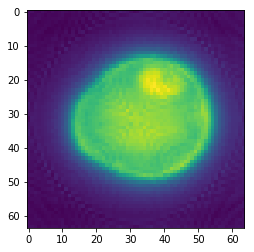

In [44]:
plt.imshow(cur_x.reshape(64, 64))
plt.show()

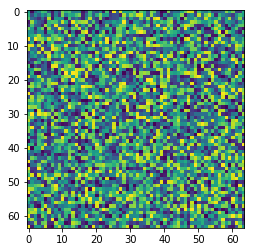

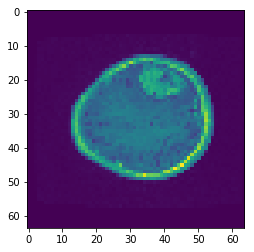

In [45]:
plt.imshow(cur_x_nn.reshape(64, 64))
plt.show()
plt.imshow(image_to_reconstruct)
plt.show()

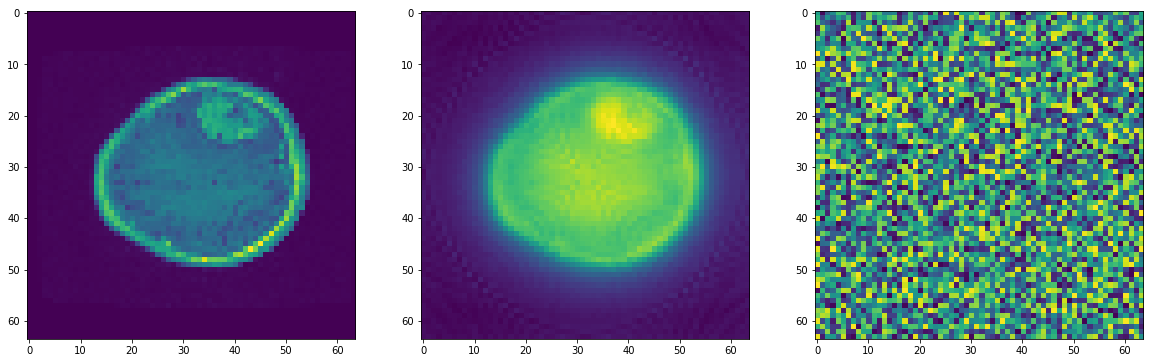

In [46]:
fig=plt.figure(figsize=(20, 20))
fig.add_subplot(1, 3, 1)
plt.imshow(image_to_reconstruct)
fig.add_subplot(1, 3, 2)
plt.imshow(cur_x)
fig.add_subplot(1, 3, 3)
plt.imshow(cur_x_nn)
plt.show()

In [47]:
print(cur_x[0])
print(cur_x_nn[0])
print(image_to_reconstruct[0])


[[ 51.37959741  57.94148298  39.46996669  34.94471585  54.94223745
   43.70104093  30.57073768  50.40600183  38.90319102  39.96787784
   56.35940524  46.02008453  37.12505898  50.68790638  42.24911853
   57.44090736  39.49670961  59.74141315  37.72928308  66.57253988
   69.93455333  42.60616713  67.83580519  90.73932796  48.09989468
   52.16332951  77.64630604 101.24963755  91.6981484   81.11653776
   60.82748715  43.58957578  50.37639322  75.27846667  85.57760292
  102.24397018 105.29072841  79.76377535  72.83832743  75.64681834
   98.14531794  79.53240845  74.94300489  70.47856416  85.42249922
   52.8345724   81.16320323  70.3502037   66.68360508  60.79180429
   59.02911401  52.88561437  65.30627021  50.11349836  64.27666328
   52.35205153  68.67393751  71.73264951  49.26132203  52.13918724
   56.75487856  69.77828489  58.37893548  68.08028385]]
[0.55146181 0.02997557 0.31941934 0.47549336 0.69731827 0.67474265
 0.29665057 0.07253101 0.38057534 0.20704964 0.79773912 0.65447291
 0.711